<a href="https://colab.research.google.com/github/rayhankwarta/Prediksi-Customer-Lifetime-Value-CLV-dengan-Machine-Learning/blob/main/Online_Retail_II_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "online_retail_II.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mashlyn/online-retail-ii-uci",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1280257036.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:   Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


# EDA Data Cleaning

In [7]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Matplotlib dan Seaborn untuk visualisasi
sns.set(style='whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# Scikit-learn untuk modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [9]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [10]:
#Menghapus baris dengan CustomerID yang kosong
df.dropna(subset=['Customer ID'], inplace=True)

In [11]:
#Menghapus transaksi retur (Quantity < 0)
df = df[df['Quantity'] > 0]

In [13]:
#Menghapus data dengan harga nol
df = df[df['Price'] > 0]

In [14]:
#Mengubah tipe data agar sesuai
df['Customer ID'] = df['Customer ID'].astype(int).astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

/tmp/ipython-input-4125127306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer ID'] = df['Customer ID'].astype(int).astype(str)
/tmp/ipython-input-4125127306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [16]:
df.info()
print(f"\nRentang waktu data: dari {df['InvoiceDate'].min()} sampai {df['InvoiceDate'].max()}")

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  int64         
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   Customer ID  805549 non-null  object        
 7   Country      805549 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 55.3+ MB

Rentang waktu data: dari 2009-12-01 07:45:00 sampai 2011-12-09 12:50:00


# Feature Engineering

In [17]:
#Membuat kolom TotalPrice
df['TotalPrice'] = df['Quantity'] * df['Price']

/tmp/ipython-input-978159303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['Price']


In [18]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [20]:
# Menghitung RFM
# Tentukan tanggal terakhir dalam dataset sebagai acuan untuk menghitung Recency
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Kelompokkan data per pelanggan
rfm_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days, # Recency
    'Invoice': 'nunique', # Frequency (jumlah invoice unik)
    'TotalPrice': 'sum' # Monetary
})

# Ubah nama kolom agar lebih jelas
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'Invoice': 'Frequency',
                       'TotalPrice': 'Monetary'}, inplace=True)

print("\nContoh Data RFM yang Dihasilkan:")
print(rfm_df.head())


Contoh Data RFM yang Dihasilkan:
             Recency  Frequency  Monetary
Customer ID                              
12346            326         12  77556.46
12347              2          8   5633.32
12348             75          5   2019.40
12349             19          4   4428.69
12350            310          1    334.40


In [23]:
# --- PENAMBAHAN FITUR BARU ---
# 1. Menghitung rata-rata nilai per transaksi (Average Basket Value)
# 2. Menghitung jumlah produk unik yang dibeli
customer_features = df.groupby('Customer ID').agg({
    'TotalPrice': 'mean', # Rata-rata nilai produk per baris, proxy untuk avg basket value
    'StockCode': 'nunique' # Jumlah produk unik
}).rename(columns={'TotalPrice': 'AvgBasketValue', 'StockCode': 'TotalUniqueProducts'})

# Gabungkan fitur baru ini ke dalam dataframe rfm
rfm_df = rfm_df.join(customer_features)

print("\nContoh Data dengan Fitur Tambahan:")
print(rfm_df.head())


Contoh Data dengan Fitur Tambahan:
             Recency  Frequency  Monetary  AvgBasketValue  TotalUniqueProducts
Customer ID                                                                   
12346            326         12  77556.46     2281.072353                   27
12347              2          8   5633.32       22.266087                  126
12348             75          5   2019.40       39.596078                   25
12349             19          4   4428.69       25.306800                  138
12350            310          1    334.40       19.670588                   17


In [27]:
# --- PENAMBAHAN FITUR INTERAKSI ---
# Hindari pembagian dengan nol dengan menambahkan 1 pada Recency
rfm_df['Frequency_per_Recency'] = rfm_df['Frequency'] / (rfm_df['Recency'] + 1)
rfm_df['Recency_x_Frequency'] = rfm_df['Recency'] * rfm_df['Frequency']

# Tampilkan data dengan semua fitur final
print("\nContoh Data dengan Fitur Interaksi:")
print(rfm_df.head())


Contoh Data dengan Fitur Interaksi:
             Recency  Frequency  Monetary  AvgBasketValue  \
Customer ID                                                 
12346            326         12  77556.46     2281.072353   
12347              2          8   5633.32       22.266087   
12348             75          5   2019.40       39.596078   
12349             19          4   4428.69       25.306800   
12350            310          1    334.40       19.670588   

             TotalUniqueProducts  Frequency_per_Recency  Recency_x_Frequency  
Customer ID                                                                   
12346                         27               0.036697                 3912  
12347                        126               2.666667                   16  
12348                         25               0.065789                  375  
12349                        138               0.200000                   76  
12350                         17               0.003215      

# Modeling & Tuning

In [28]:
# --- TAHAP 3 (FINAL) ---

# Mendefinisikan fitur (X) dengan SEMUA kolom yang relevan
X = rfm_df[['Recency', 'Frequency', 'AvgBasketValue', 'TotalUniqueProducts',
             'Frequency_per_Recency', 'Recency_x_Frequency']]
y = rfm_df['Monetary']

# Transformasi Logaritmik pada Target (tetap sama)
y_log = np.log1p(y)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.3, random_state=42)

print(f"\nDistribusi target 'Monetary' sebelum transformasi:\n{y.describe()}")
print(f"\nDistribusi target setelah transformasi log:\n{y_log.describe()}")


Distribusi target 'Monetary' sebelum transformasi:
count      5878.000000
mean       3018.616737
std       14737.731040
min           2.950000
25%         348.762500
50%         898.915000
75%        2307.090000
max      608821.650000
Name: Monetary, dtype: float64

Distribusi target setelah transformasi log:
count    5878.000000
mean        6.836550
std         1.387864
min         1.373716
25%         5.857254
50%         6.802300
75%         7.744175
max        13.319282
Name: Monetary, dtype: float64


In [29]:
# --- TAHAP 4 (BARU) ---
from sklearn.model_selection import GridSearchCV

# Tentukan parameter grid yang ingin dicoba
# Grid ini kecil untuk kecepatan, Anda bisa memperluasnya
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model
rf_model = RandomForestRegressor(random_state=42)

# Inisialisasi GridSearchCV
# cv=3 artinya menggunakan 3-fold cross-validation
# n_jobs=-1 artinya menggunakan semua core CPU untuk mempercepat proses
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Latih grid search pada data logaritmik
print("\nMemulai Tuning Hyperparameter dengan GridSearchCV...")
grid_search.fit(X_train, y_log_train)

print(f"\nParameter terbaik yang ditemukan: {grid_search.best_params_}")


Memulai Tuning Hyperparameter dengan GridSearchCV...
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Parameter terbaik yang ditemukan: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}



Melatih model LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1329
[LightGBM] [Info] Number of data points in the train set: 4114, number of used features: 6
[LightGBM] [Info] Start training from score 6.857696
Model selesai dilatih.

--- Hasil Evaluasi Model FINAL (LightGBM + Fitur Lanjutan) ---
Mean Absolute Error (MAE): $1,166.94
R-squared (R2 Score): 53.87%


<Figure size 1000x700 with 0 Axes>

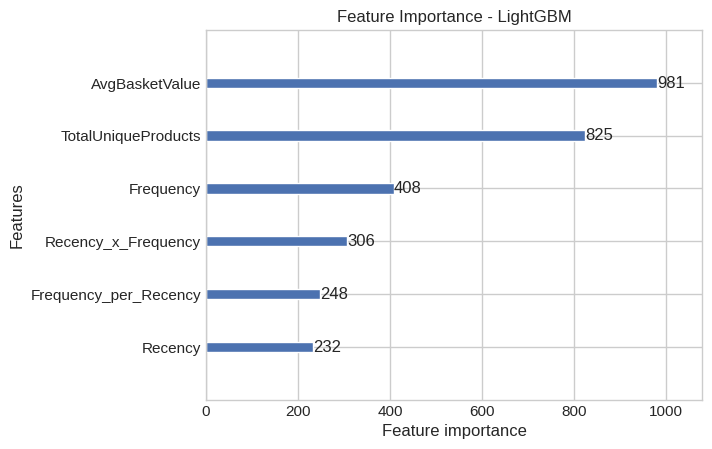

In [30]:
# --- TAHAP 4 (FINAL) ---
import lightgbm as lgb

# Inisialisasi model LightGBM Regressor
# Kita gunakan parameter default terlebih dahulu
lgbm_model = lgb.LGBMRegressor(random_state=42)

# Melatih model menggunakan data latih logaritmik
print("\nMelatih model LightGBM...")
lgbm_model.fit(X_train, y_log_train)
print("Model selesai dilatih.")

# Membuat prediksi pada data uji (hasilnya masih dalam skala log)
y_log_pred = lgbm_model.predict(X_test)

# Kembalikan prediksi dan data uji ke skala asli
y_pred_orig = np.expm1(y_log_pred)
y_test_orig = np.expm1(y_log_test)

# Evaluasi performa model final
mae_final = mean_absolute_error(y_test_orig, y_pred_orig)
r2_final = r2_score(y_test_orig, y_pred_orig)

print("\n--- Hasil Evaluasi Model FINAL (LightGBM + Fitur Lanjutan) ---")
print(f"Mean Absolute Error (MAE): ${mae_final:,.2f}")
print(f"R-squared (R2 Score): {r2_final:.2%}")

# Visualisasi Feature Importance
# Melihat fitur mana yang paling dianggap penting oleh model
plt.figure(figsize=(10, 7))
lgb.plot_importance(lgbm_model, max_num_features=10)
plt.title("Feature Importance - LightGBM")
plt.show()